# Описание проекта


Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».


Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!


Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
1. Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
2. Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).
С помощью модели нужно отобрать коров по двум критериям:
* средний удой за год — не менее 6000 килограммов;
* молоко должно быть вкусным.

**Цели работы:**
- Проанализировать данные: выявить корреляции и устранить аномалии.
- Подготовить данные: обработать пропуски, закодировать признаки, устранить нелинейности.
- Создать модель линейной регрессии для прогнозирования удоя коров.
- Создать модель логистической регрессии для предсказания вкуса молока.
- Оценить качество моделей с использованием метрик
- Подготовить рекомендации фермеру по покупке коров и улучшению моделей.

**План работы:**
* Изучить общую информацию о данных.
* Провести предобработку данных.
* Провести исследовательский анализ данных.
* Построить модели линейной и логистической регрессии.
* Спрогнозировать удой и вкус молока для новых коров.
* Сделать общий вывод и подготовить рекомендации.

**Описание данных:**

ferma_main.csv:
* id — уникальный идентификатор коровы.
* Удой, кг — масса молока, которую корова даёт в год (в килограммах).
* ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.Сырой протеин, г — содержание сырого протеина в корме (в граммах).
* СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
* Порода — порода коровы.
* Тип пастбища — ландшафт лугов, на которых паслась корова.
* порода папы_быка — порода папы коровы.
* Жирность,% — содержание жиров в молоке (в процентах).
* Белок,% — содержание белков в молоке (в процентах).
* Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
* Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

- Характеристики коровы: id, Порода, порода папы_быка, Возраст.
- Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
- Характеристика пастбища: Тип пастбища.
- Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.

ferma_dad.csv:
* id — уникальный идентификатор коровы.
* Имя Папы — имя папы коровы.

cow_buy.csv:

* Порода — порода коровы.
* Тип пастбища — ландшафт лугов, на которых паслась корова.
* порода папы_быка — порода папы коровы.
* Имя_папы — имя папы коровы.
* Текущая_жирность,% — содержание жиров в молоке (в процентах).
* Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
* Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

* Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
* Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
* Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их предстоит предсказать!

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb 
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
!pip install -q phik
from phik.report import plot_correlation_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [2]:
data_ferma_main = pd.read_csv("/datasets/ferma_main.csv", sep = ";", decimal = ",")
data_ferma_dad = pd.read_csv("/datasets/ferma_dad.csv", sep = ";")
data_cow_buy = pd.read_csv("/datasets/cow_buy.csv", sep = ";", decimal = ",")

In [3]:
display(data_ferma_main.head())
display(data_ferma_dad.head())
display(data_cow_buy.head())

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [4]:
data_ferma_main.info()
data_ferma_dad.info()
data_cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

**Итоги по обзору данных:**
* По первичном осмотре пропуски не обнаруженны и все типы данных соотвествуют описанию
* Анональных значений на первый взгляд нет
* Есть проблемы с названиями столбцов, нужно привести в змеиный регистр и удалить лишнюю информацию 
* Названия столбцов жирности и белка отличаются в 2 датафреймах, нужно привести их в единный формат

##  Предобработка данных

In [5]:
data_ferma_main.columns = data_ferma_main.columns.str.lower()
data_ferma_dad.columns = data_ferma_dad.columns.str.lower()
data_cow_buy.columns = data_cow_buy.columns.str.lower()

In [6]:
display(data_ferma_main.head())
display(data_ferma_dad.head())
display(data_cow_buy.head())

,id,"удой, кг",эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),порода,тип пастбища,порода папы_быка,"жирность,%","белок,%",вкус молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


,id,имя папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


,порода,тип пастбища,порода папы_быка,имя_папы,"текущая_жирность,%","текущий_уровень_белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [7]:
def remove_unit(data):
    data.columns = [name.split(',')[0] for name in data.columns]
    data.columns = [name.split(' (')[0] for name in data.columns]

In [8]:
remove_unit(data_ferma_main)
remove_unit(data_ferma_dad)
remove_unit(data_cow_buy)

In [9]:
display(data_ferma_main.head())
display(data_ferma_dad.head())
display(data_cow_buy.head())

,id,удой,эке,сырой протеин,спо,порода,тип пастбища,порода папы_быка,жирность,белок,вкус молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


,id,имя папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


,порода,тип пастбища,порода папы_быка,имя_папы,текущая_жирность,текущий_уровень_белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [10]:
def add_underscore(data):
    data.columns = [name.replace(" ", "_") for name in data.columns]

In [11]:
data_cow_buy.rename(columns={"текущая_жирность": "жирность", "текущий_уровень_белок": "белок"}, inplace=True)


In [12]:
add_underscore(data_ferma_main)
add_underscore(data_ferma_dad)
add_underscore(data_cow_buy)

In [13]:
display(data_ferma_main.head())
display(data_ferma_dad.head())
display(data_cow_buy.head())

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


**Названия столбцов были приведены в корректный и удобный формат**

In [14]:
data_ferma_main.isna().sum()

id                  0
удой                0
эке                 0
сырой_протеин       0
спо                 0
порода              0
тип_пастбища        0
порода_папы_быка    0
жирность            0
белок               0
вкус_молока         0
возраст             0
dtype: int64

In [15]:
data_ferma_dad.isna().sum()

id          0
имя_папы    0
dtype: int64

In [16]:
data_cow_buy.isna().sum()

порода              0
тип_пастбища        0
порода_папы_быка    0
имя_папы            0
жирность            0
белок               0
возраст             0
dtype: int64

**Пропусков не обнаружено**

In [17]:
data_ferma_main.duplicated().sum()

5

In [18]:
data_ferma_main[data_ferma_main.duplicated()]

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
629,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
633,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


In [19]:
def drop_duplicates(data):
    data = data.drop_duplicates().reset_index(drop = True)
    return data

In [20]:
data_ferma_main = drop_duplicates(data_ferma_main)

In [21]:
data_ferma_main.duplicated().sum()

0

In [22]:
data_ferma_dad.duplicated().sum()

0

In [23]:
data_cow_buy.duplicated().sum()

4

In [24]:
data_cow_buy[data_cow_buy.duplicated()]

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [25]:
data_cow_buy = drop_duplicates(data_cow_buy)

In [26]:
data_cow_buy.duplicated().sum()

0

**Все явные дубликаты были удалены**

In [27]:
data_ferma_main.columns

Index(['id', 'удой', 'эке', 'сырой_протеин', 'спо', 'порода', 'тип_пастбища',
       'порода_папы_быка', 'жирность', 'белок', 'вкус_молока', 'возраст'],
      dtype='object')

In [28]:
data_ferma_main["тип_пастбища"].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [29]:
data_ferma_main["порода_папы_быка"].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [30]:
data_ferma_main["порода"].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [31]:
data_ferma_main["тип_пастбища"] = data_ferma_main["тип_пастбища"].replace("Равнинные", "равнинное")
data_ferma_main["тип_пастбища"] = data_ferma_main["тип_пастбища"].replace("Равнинное", "равнинное")
data_ferma_main["тип_пастбища"] = data_ferma_main["тип_пастбища"].replace("Холмистое", "холмистое")
data_ferma_main["порода_папы_быка"] = data_ferma_main["порода_папы_быка"].replace("Айдиалл", "Айдиал")

In [32]:
data_cow_buy.columns

Index(['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы', 'жирность',
       'белок', 'возраст'],
      dtype='object')

In [33]:
data_cow_buy["тип_пастбища"].unique()

array(['холмистое', 'равнинное'], dtype=object)

In [34]:
data_cow_buy["порода"].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [35]:
data_cow_buy["порода_папы_быка"].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [36]:
data_cow_buy["имя_папы"].unique()

array(['Геркулес', 'Буйный', 'Барин', 'Соловчик'], dtype=object)

In [37]:
data_cow_buy.duplicated().sum()

0

In [38]:
data_ferma_main.duplicated().sum()

0

**Неявные дубликаты были устранены, и была проведена повторная проверка на полные дубликаты**

In [39]:
display(data_ferma_main.head())

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


In [40]:
data_ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                629 non-null    int64  
 1   удой              629 non-null    int64  
 2   эке               629 non-null    float64
 3   сырой_протеин     629 non-null    int64  
 4   спо               629 non-null    float64
 5   порода            629 non-null    object 
 6   тип_пастбища      629 non-null    object 
 7   порода_папы_быка  629 non-null    object 
 8   жирность          629 non-null    float64
 9   белок             629 non-null    float64
 10  вкус_молока       629 non-null    object 
 11  возраст           629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.1+ KB


In [41]:
display(data_ferma_dad.head())

,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [42]:
data_ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   имя_папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [43]:
display(data_cow_buy.head())

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [44]:
data_cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   порода            16 non-null     object 
 1   тип_пастбища      16 non-null     object 
 2   порода_папы_быка  16 non-null     object 
 3   имя_папы          16 non-null     object 
 4   жирность          16 non-null     float64
 5   белок             16 non-null     float64
 6   возраст           16 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.0+ KB


**Нет проблем с форматом данных**

**Итоги предобработки данных:**

* Названия столбцов приведены к корректному формату (змеиный регистр).
* Названия столбцов изменены для удобства анализа данных.
* Пропусков в данных нет.
* Явные и неявные дубликаты устранены.
* Формат и тип данных соответствуют требованиям и не имеют проблем.

## Исследовательский анализ данных

In [45]:
data_ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                629 non-null    int64  
 1   удой              629 non-null    int64  
 2   эке               629 non-null    float64
 3   сырой_протеин     629 non-null    int64  
 4   спо               629 non-null    float64
 5   порода            629 non-null    object 
 6   тип_пастбища      629 non-null    object 
 7   порода_папы_быка  629 non-null    object 
 8   жирность          629 non-null    float64
 9   белок             629 non-null    float64
 10  вкус_молока       629 non-null    object 
 11  возраст           629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.1+ KB


In [46]:
data_ferma_main.describe()

,id,удой,эке,сырой_протеин,спо,жирность,белок
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


**Можно сразу заметить аномальные значения. Например максимальный удой не может быть равен 45616 килограммам. Более подробный анализ возможен при детальном анализе признаков**

In [47]:
def plot_hist(data, name, unit, number, x_beg = None, x_end = None):
    data[name].plot(kind="hist", bins = number, figsize=(10,5), title=f"Гистограмма для '{name}'", grid = True, edgecolor = "black")
    plt.xlabel(f"{name}, {unit}")
    plt.ylabel("Частота")
    if x_beg is not None and x_end is not None:
        plt.xlim(x_beg, x_end)
    plt.show()

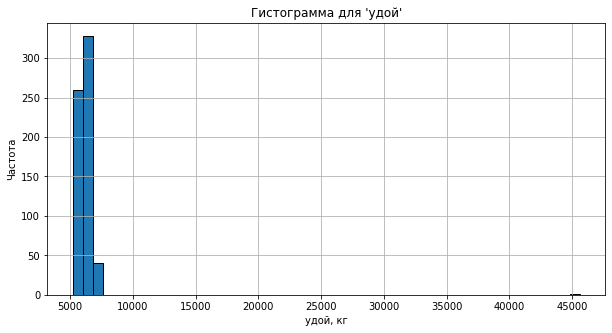

In [48]:
plot_hist(data_ferma_main, "удой", "кг", 50)

Очевиден выброс в районе 45000 кг, что было отмечено ранее. Посмотрим на график без учета выбросов.

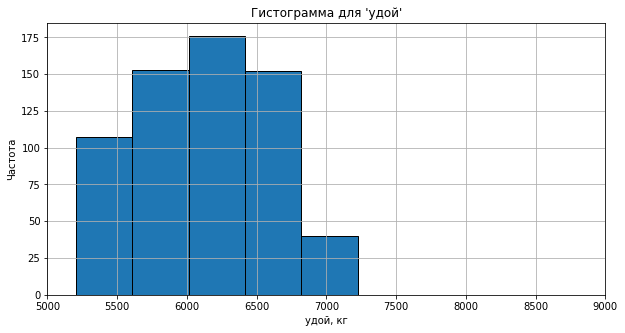

In [49]:
plot_hist(data_ferma_main, "удой", "кг", 100, 5000, 9000)

В среднем количество удоя около 6100 кг. В целом график подчиняется нормальному распределению, но присутствует резкий спуск в районе 7000 кг.

In [50]:
def plot_box(data, name, lower, upper):
    plt.ylim(lower, upper)
    data.boxplot(name)

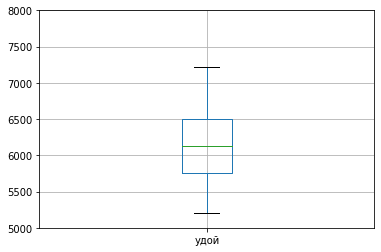

In [51]:
plot_box(data_ferma_main, "удой", 5000, 8000)

In [52]:
data_ferma_main["удой"].describe()

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: удой, dtype: float64

Вверхний ус упирается на отметке 7250, а нижний на 5250. Можно сделать вывод, что значения за их пределами являются выбросами. Стоит от них избавиться.

In [53]:
def delete_outliers(data, name, lower, upper):
    initial = data[name].count()
    data = data.query(f" {lower} <={name} <= {upper}")
    final = data[name].count()
    percent = (1 - (final/initial)) * 100
    print(f"Доля выбросов: {percent:.2f}%")
    data = data.reset_index(drop = True)
    return data

In [54]:
data_ferma_main = delete_outliers(data_ferma_main, "удой", 0, 8000)

Доля выбросов: 0.16%


In [55]:
data_ferma_main["удой"].describe()

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: удой, dtype: float64

**Медианное значение равно 6133 кг, когда максимальное и минимальное равны 7222 и 5204 соотвественно. Доля выбросов меньше 0.5%, поэтому можно безопасно удалить эти данные.**

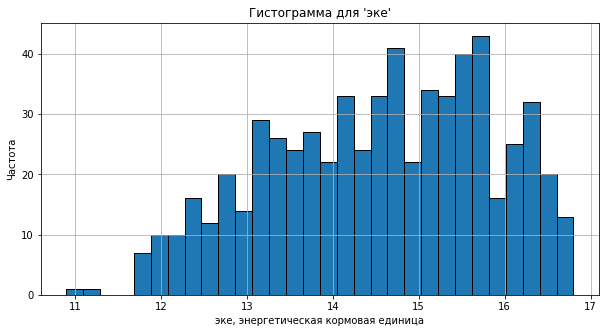

In [56]:
plot_hist(data_ferma_main, "эке", "энергетическая кормовая единица", 30)

График скошен направо, следует присмотреться к данным на отметке 11.

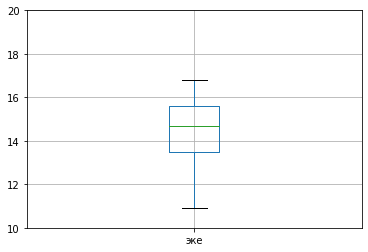

In [57]:
plot_box(data_ferma_main, "эке", 10, 20)

Выбросы не обнаружены, нижний ус упирается в 11, а вверхний около 17

In [58]:
data_ferma_main["эке"].describe()

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: эке, dtype: float64

**Медианное значение равно 14.7, когда максимальное и минимальное равны 16.8 и 10.9 соотвественно.**

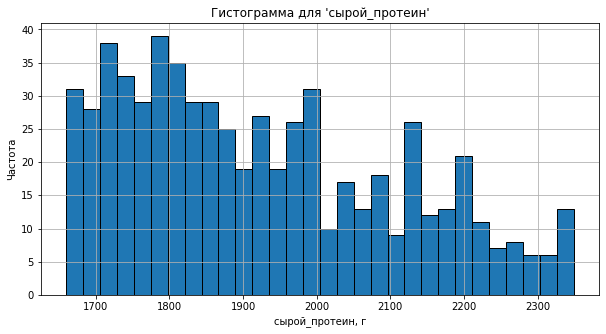

In [59]:
plot_hist(data_ferma_main, "сырой_протеин", "г", 30)

Мы можем наблюдать большое количество значений в начале и постепенное уменьшение со встречающимися пиками.

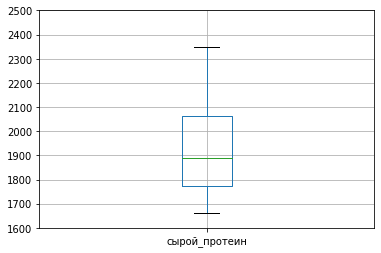

In [60]:
plot_box(data_ferma_main, "сырой_протеин", 1600, 2500)


Выбросов нет. Вверхний ус упирается на отметке примерно 2350, а нижний 1680.

In [61]:
data_ferma_main["сырой_протеин"].describe()

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: сырой_протеин, dtype: float64

**Медианное значение равно 1888, когда максимальное и минимальное равны 2349 и 1660 соотвественно.**

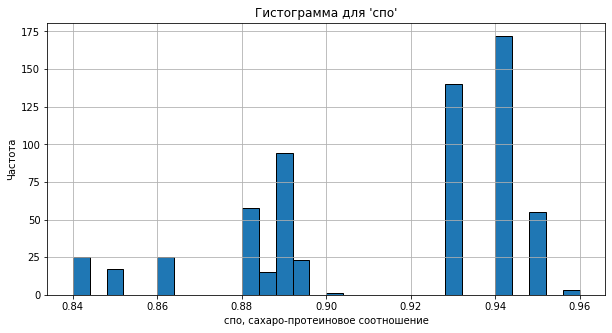

In [62]:
plot_hist(data_ferma_main, "спо", "сахаро-протеиновое соотношение", 30)

Значения нерегулярны, наблюдается пик на отметке 0.94

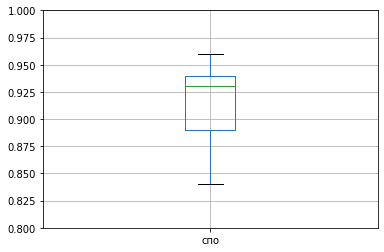

In [63]:
plot_box(data_ferma_main, "спо", 0.8, 1)


In [64]:
data_ferma_main["спо"].describe()

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: спо, dtype: float64

**Медианное значение равно 0.93, когда максимальное и минимальное равны 0.96 и 0.84 соотвественно. Выбросов нет**

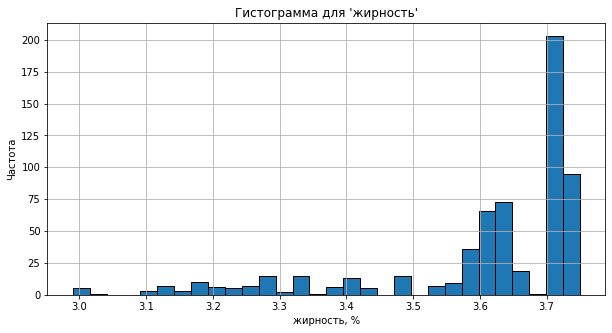

In [65]:
plot_hist(data_ferma_main, "жирность", "%", 30)

На графике видно, что значения до 3.6 имеют одинаковую низкую частотность. Наблюдаются 2 пика на отметках 3.6 и 3.7

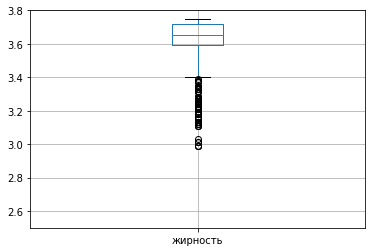

In [66]:
plot_box(data_ferma_main, "жирность", 2.5, 3.80)

Судя по графику можно сказать, что значения ниже отметки нижнего уса(3.4) можно считать выбросами.

In [67]:
data_ferma_main["жирность"].describe()

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: жирность, dtype: float64

In [68]:
print(data_ferma_main.query("жирность<= 3.4")["жирность"].count())

87


Значений слишком много и при этом такие показатели жирности являются нормой, поэтому оставим эти данные.

**Медианное значение равно 3.65, когда максимальное и минимальное равны 3.75 и 2.99 соотвественно.**

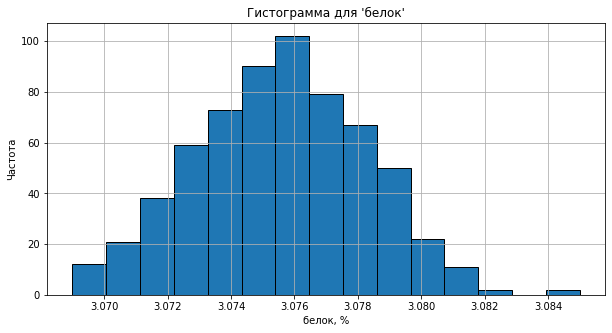

In [69]:
plot_hist(data_ferma_main, "белок", "%", 15)

Наблюдается нормальное распределение с медианной около 3.076

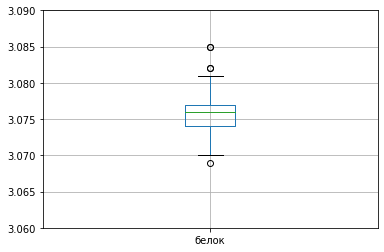

In [70]:
plot_box(data_ferma_main, "белок", 3.06, 3.09)

Выбросы имеются на отметках ниже 3.070 и выше 3.080

In [71]:
data_ferma_main = delete_outliers(data_ferma_main, "белок", 0, 3.084)

Доля выбросов: 0.32%


In [72]:
data_ferma_main["белок"].describe()

count    626.000000
mean       3.075641
std        0.002500
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.082000
Name: белок, dtype: float64

**Медианное значение равно 3.076, когда максимальное и минимальное равны 3.082 и 3.069 соотвественно. Выбросы были удалены только после отметки 3.084, так как остальные расположенны в относительной близости. Их доля составляет почти 3% от всех данных. Удаление такого большого количества данных недопустимо. Нынешнаяя доля выбросов составила только 0.32%**

In [73]:
def plot_pie(data, name):
    count = data[name].value_counts()
    plt.figure(figsize=(10, 5))
    count.plot(kind="pie", autopct="%1.1f%%", startangle=90)
    plt.title(f"Круговая диаграмма для '{name}'")
    plt.ylabel('')
    plt.show()

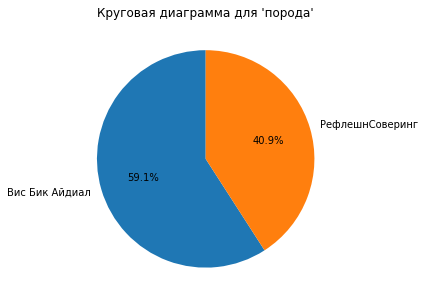

In [74]:
plot_pie(data_ferma_main, "порода")

Можно сделать вывод, что коров породы Вис Бик Айдиал больше в 1.44 раз чем Рефлешн Соверинг.

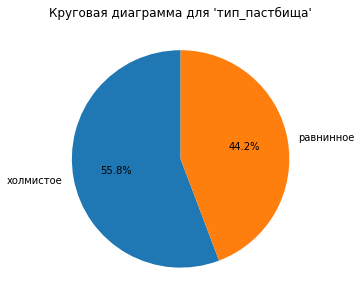

In [75]:
plot_pie(data_ferma_main, "тип_пастбища")

Можно сделать вывод, что холмистых пастбищ в 1.26 раз больше чем равнинных.

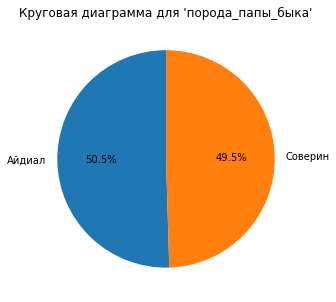

In [76]:
plot_pie(data_ferma_main, "порода_папы_быка")

Можно сделать вывод, что пород папы быка практически одинаковы.

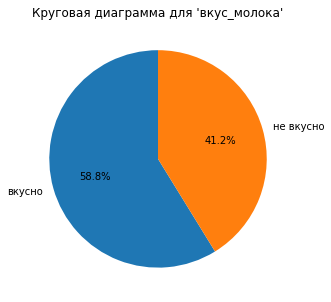

In [77]:
plot_pie(data_ferma_main, "вкус_молока")

Можно сделать вывод, что вкусного молока в 1.43 раза больше чем невкусного.

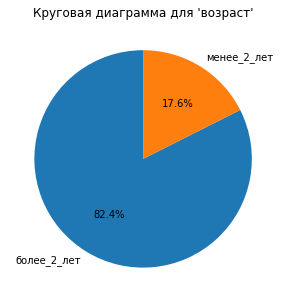

In [78]:
plot_pie(data_ferma_main, "возраст")

Можно сделать вывод, что коров старше 2 лет в 4.68 раз больше чем младше.

**Итоги по исследовательскому анализу данных:**
* Были замечены аномальные значения среди удоя, где максмальный показатель был равен 45616 килограммам. Медианное значение равно 6133 кг, когда максимальное и минимальное равны 7222 и 5204 соотвественно. Доля выбросов меньше 0.5%, поэтому можно безопасно удалить эти данные. Сам график был похож на нормальное распределение.
* График ЭКЕ был скошен направо. Медианное значение равно 14.7, когда максимальное и минимальное равны 16.8 и 10.9 соотвественно.
* На графике сырого протеина мы можем наблюдать большое количество значений в начале и постепенное уменьшение со встречающимися пиками. Медианное значение равно 1888, когда максимальное и минимальное равны 2349 и 1660 соотвественно.
* График СПО нерегулярен. Медианное значение равно 0.93, когда максимальное и минимальное равны 0.96 и 0.84 соотвественно.
* На графике жирности видно, что значения до 3.6 имеют одинаковую низкую частотность. Наблюдаются 2 пика на отметках 3.6 и 3.7. Медианное значение равно 3.65, когда максимальное и минимальное равны 3.75 и 2.99 соотвественно.
* Медианное значение белка равно 3.076, когда максимальное и минимальное равны 3.082 и 3.069 соотвественно. Выбросы были удалены только после отметки 3.084, так как остальные расположенны в относительной близости. Их доля составляет почти 3% от всех данных. Удаление такого большого количества данных недопустимо. Нынешнаяя доля выбросов составила только 0.32%
* Коров породы Вис Бик Айдиал больше в 1.44 раз чем Рефлешн Соверинг.
* Холмистых пастбищ в 1.26 раз больше чем равнинных.
* Пород папы быка практически одинаковы.
* Вкусного молока в 1.43 раза больше чем невкусного.
* Коров старше 2 лет в 4.68 раз больше чем младше.

## Корреляционный анализ

In [203]:
data_ferma_main.drop('id',  axis=1).phik_matrix()

interval columns not set, guessing: ['удой', 'эке', 'сырой_протеин', 'спо', 'жирность', 'белок', 'вкус_молока']


,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
удой,1.000000,0.720646,0.467295,0.661673,0.165272,0.279903,0.520826,0.708252,0.105292,0.174930,0.998099
эке,0.720646,1.000000,0.455827,0.591773,0.119709,0.109629,0.177383,0.718182,0.000000,0.276455,0.772146
сырой_протеин,0.467295,0.455827,1.000000,0.390014,0.094565,0.099421,0.000000,0.404505,0.230165,0.175284,0.350538
спо,0.661673,0.591773,0.390014,1.000000,0.054792,0.152000,0.425801,0.643486,0.000000,0.575493,0.748497
порода,0.165272,0.119709,0.094565,0.054792,1.000000,0.213324,0.089668,0.222786,0.355595,0.000000,0.060176
тип_пастбища,0.279903,0.109629,0.099421,0.152000,0.213324,1.000000,0.000000,0.000000,0.138761,0.270283,0.129014
порода_папы_быка,0.520826,0.177383,0.000000,0.425801,0.089668,0.000000,1.000000,0.000000,0.174571,0.000000,0.356500
жирность,0.708252,0.718182,0.404505,0.643486,0.222786,0.000000,0.000000,1.000000,0.000000,0.203021,0.680756
белок,0.105292,0.000000,0.230165,0.000000,0.355595,0.138761,0.174571,0.000000,1.000000,0.131324,0.000000
вкус_молока,0.174930,0.276455,0.175284,0.575493,0.000000,0.270283,0.000000,0.203021,0.131324,1.000000,0.164169


**Оценив взаимосвязь между признаками можно сделать вывод, что удой и возраст имеют очень сильную связь - 0.99, следом идут эке и жирность с коэффициентами 0.72 и 0.71 соответсвенно. Если оценивать мультимультиколлинеарность между входящими признаками, то можно заметить сильную связь между эке с возрастом - 0.77, спо с возрастом - 0.75 и эке с жирностью - 0.72. Возможно стоит рассмотреть исключение каких-то из признаков, чтобы не помешать нашей модели линейной регрессии.**

In [80]:
data_ferma_main.drop('id',  axis=1).phik_matrix()['удой'].sort_values(ascending = False)

interval columns not set, guessing: ['удой', 'эке', 'сырой_протеин', 'спо', 'жирность', 'белок']


удой                1.000000
возраст             0.998099
эке                 0.720646
жирность            0.708252
спо                 0.661673
порода_папы_быка    0.520826
сырой_протеин       0.467295
тип_пастбища        0.279903
вкус_молока         0.174930
порода              0.165272
белок               0.105292
Name: удой, dtype: float64

Белок, порода, вкус молока и тип пастбища меньше всего коррелируют с удоем. В любом случае стоит рассмотреть каждый признак на диаграмме рассеяния.

In [81]:
def plot_scatter(data, x_name, y_name, category=None, x_beg=None, x_end=None, y_beg=None, y_end=None):
    plt.figure(figsize=(10, 5))
    if category is not None:
        sb.scatterplot(data=data, x=x_name, y=y_name, hue=category, palette="viridis", edgecolor="k", alpha=0.7)
    else:
        plt.scatter(data[x_name], data[y_name], alpha=0.5, edgecolors="k")

    plt.title(f"Диаграмма рассеяния: {x_name} vs {y_name}")
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.grid(True, linestyle="--", alpha=0.5)
    
    if x_beg is not None and x_end is not None:
        plt.xlim(x_beg, x_end)
    if y_beg is not None and y_end is not None:
        plt.ylim(y_beg, y_end)
    
    plt.show()

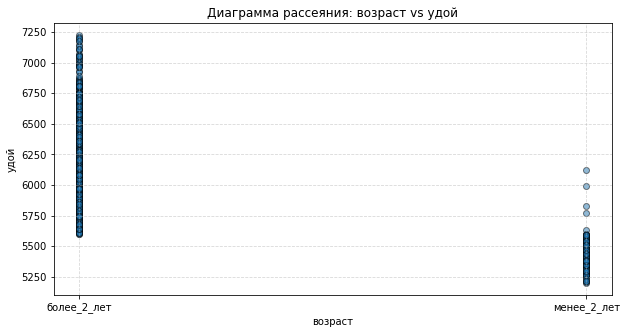

In [82]:
plot_scatter(data_ferma_main, "возраст", "удой")

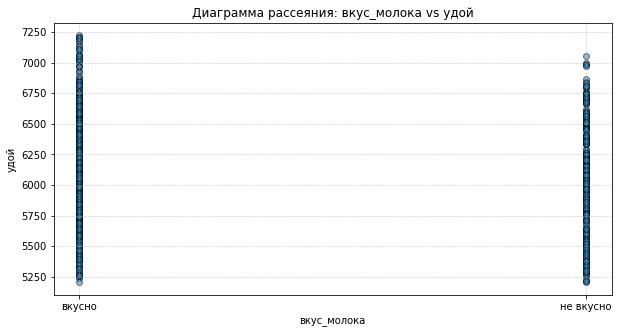

In [83]:
plot_scatter(data_ferma_main, "вкус_молока", "удой")

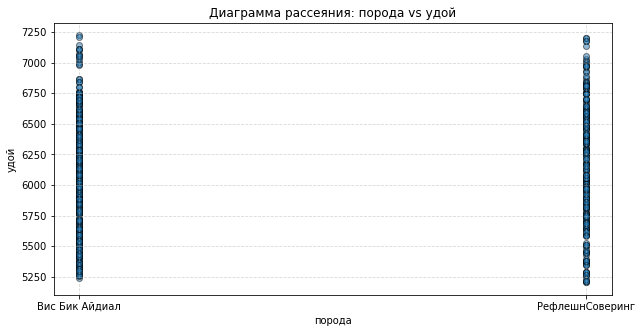

In [84]:
plot_scatter(data_ferma_main, "порода", "удой")

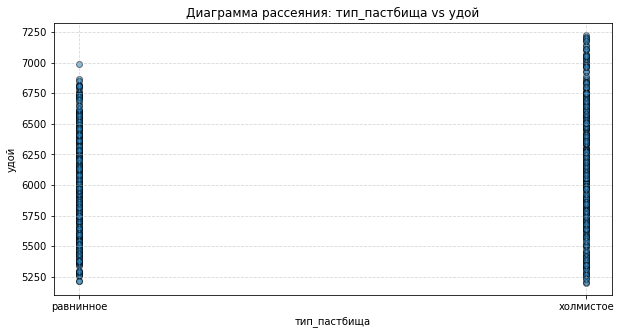

In [85]:
plot_scatter(data_ferma_main, "тип_пастбища", "удой")

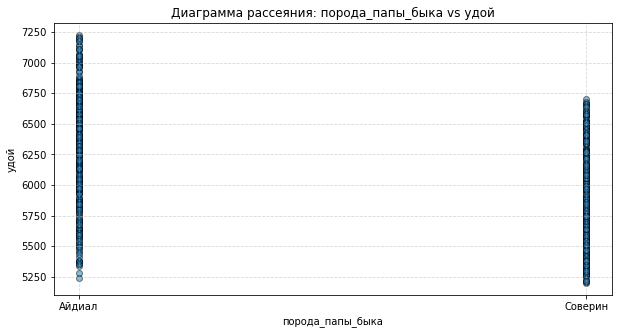

In [86]:
plot_scatter(data_ferma_main, "порода_папы_быка", "удой")

Изучив диаграмму рассеяния категориальных признаков можно сделать следующие выводы:
* Возраст в действительности очень сильно влияет на удой коровы, молодые коровы(меньше 2 лет) дают разительно меньше удоя чем коровы старше. Наблюдается сильная линейная связь с данным категориальным признаком.
* Вкус молока не влияет на удой коровы. Можно выделить только то, что у данных с самым большим удоем всегда именно вкусное молоко. Можно отнести этот признак к нелинейной связи
* Трудно выявить связь породы на количество удоя, так как она неразличима и одинакова между породами, можно отнести к нелинейной связи
* У типа пастбища связь тоже небольшая, заметно только то, что у больго удоя тип пастбища является холмистым. Можно также отнести к нелинейной связи.
* Порода папы быка влияет на количество удоя, так как у Айдиала больше удоя чем у Соверина.


Возможно стоит добавить дополнительные признаки, что учесть возможные нелинейности

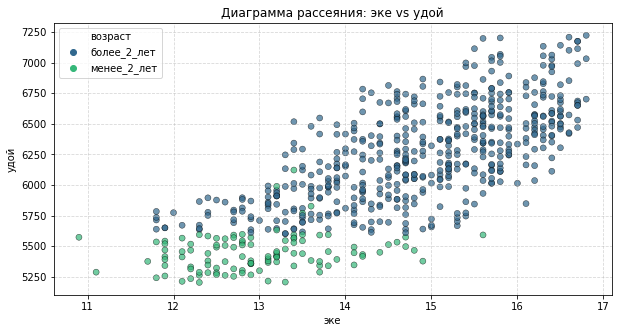

In [87]:
plot_scatter(data_ferma_main, "эке", "удой", "возраст")

Мы видим, что увеличение эке положительно влияет на рост удоя. Тем не менее, стоит обратить внимание, что каждое увеличение эке все больше влияет на удой, возможно присутствует нелинейная связь. В целом телята старше 2 лет дают удоя больше, но именно с увеличением эке они дают больше удоя. В случае телят младше 2 лет, то увеличение эке не так выразительно. Поэтому стоит рассматривать эке именно с категорией более 2 лет, чтобы получить более высокое значение удоя.

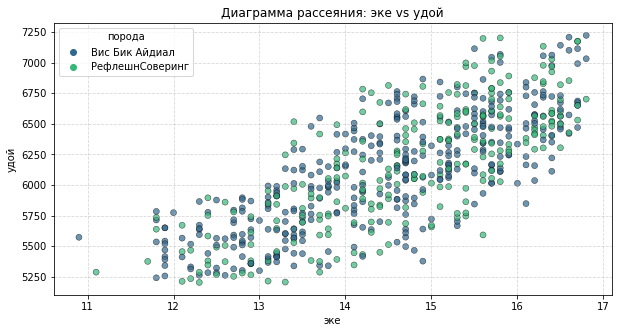

In [88]:
plot_scatter(data_ferma_main, "эке", "удой", "порода")

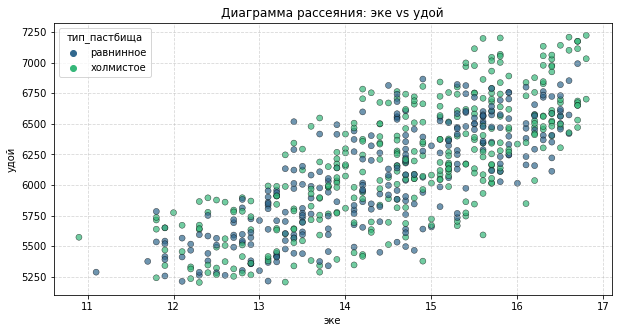

In [89]:
plot_scatter(data_ferma_main, "эке", "удой", "тип_пастбища")

В случае типа пастбища и породы, то нет каких-то выразительных отличий между категориями и влиянием эке на удой. 

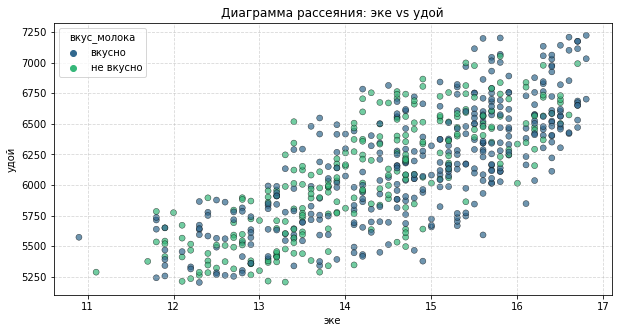

In [90]:
plot_scatter(data_ferma_main, "эке", "удой", "вкус_молока")

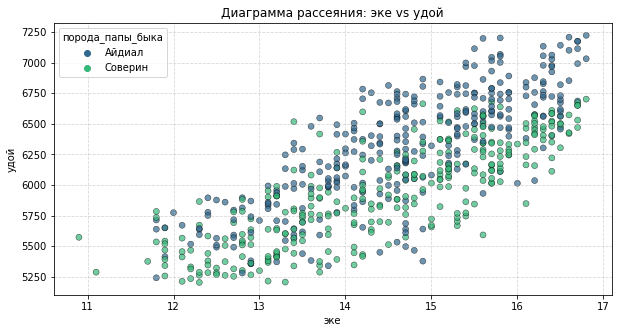

In [91]:
plot_scatter(data_ferma_main, "эке", "удой", "порода_папы_быка")

Если рассматривать удой вместе с породой папы быка и вкусом молока, то можно отметить, что среди высокого эке много вкусного молока. Данное наблюдение будет полезно на этапе классификации. В случае породы папы быка, то мы видим, что Айдиал доминирует над Соверином с увеличением эке в рамках высокого удоя. Иначе говоря при высоком эке Айдиал в лице породы папы быка дает больший удой.

**Промежуточный вывод:**
* Увеличение эке положительно влияет на рост удоя, замечается нелинейная зависимость
* С увеличением эке телята старше 2 лет дают больше удоя. В случае телят младше 2 лет, то увеличение эке не так выразительно.
* Среди высокого эке много вкусного молока
* При высоком эке Айдиал в лице породы папы быка дает больший удой

Идеальным вариантом является: теленок старше 2 лет с отцом породы Айдиал и высоким эке

**Далее я не буду включать зависимости количественных признаков от всех категориальных. Сосредоточусь на самых важных наблюдениях.**

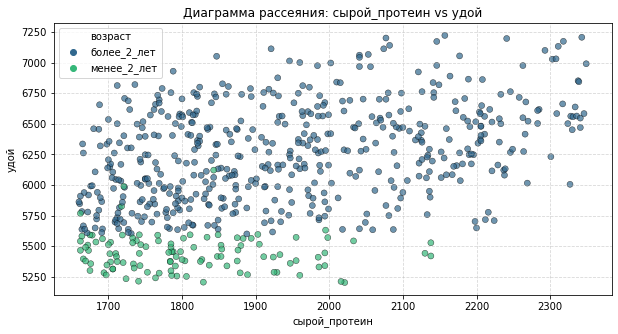

In [92]:
plot_scatter(data_ferma_main, "сырой_протеин", "удой", "возраст")

В случае сырого протеина, то линейная связь слабая и не особо выразительная. Из других наблюдей, то опять выделяется категориальный признак возраст.  

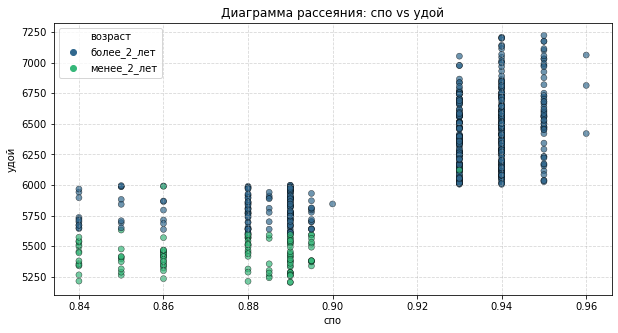

In [93]:
plot_scatter(data_ferma_main, "спо", "удой", "возраст")

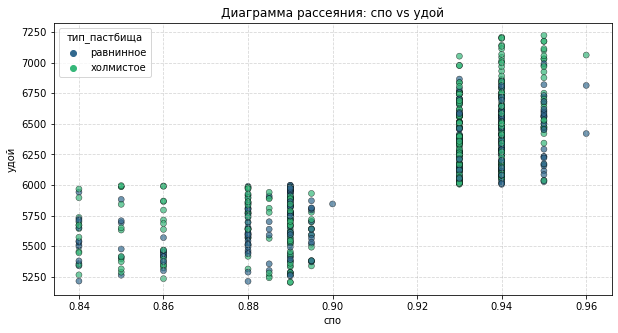

In [94]:
plot_scatter(data_ferma_main, "спо", "удой", "тип_пастбища")

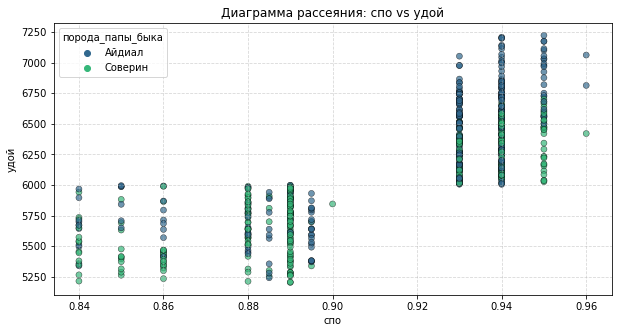

In [95]:
plot_scatter(data_ferma_main, "спо", "удой", "порода_папы_быка")

Сама зависимость сахаро-протеинового соотношения довольно резка, так как увеличение спо не имело никакого влияния на удой вплоть до отметки 0.93, далее при увеличении спо удой не сильно увеличивется. Можно сделать вывод, что на удой влияет именно определенное количество спо, а именно 0.93. Несмотря на то, что коэффициент равен 0.66(прямая зависимость), то на деле линейная зависимость отсутствует. Возможно имеет смысл поменять весь столбец данных на категориальный признак выше 0.92 или нет. Тем не менее, возраст старше 2 лет в любом случае дает больше удоя. При высоком удое чаще всего встречается холмистые пастбища. При высоком спо Айдиал дает больше удоя.

**Промежуточный вывод:**
* В случае сырого протеина, то линейная связь слабая и не особо выразительная
* На высокий удой влияет именно определенное количество спо, а именно 0.93 и выше. Прямое увеличение спо слабо влияет на количество удоя. 
* Возможно имеет смысл поменять весь столбец данных(сдо) на категориальный признак выше 0.92 или нет
* При высоком удое чаще всего встречается холмистые пастбища
* При высоком спо Айдиал дает больше удоя

**Если обновить идеальный портрет, то мы получим:
Идеальным вариантом является: теленок старше 2 лет с отцом породы Айдиал, высоким эке и значением спо выше 0.92**

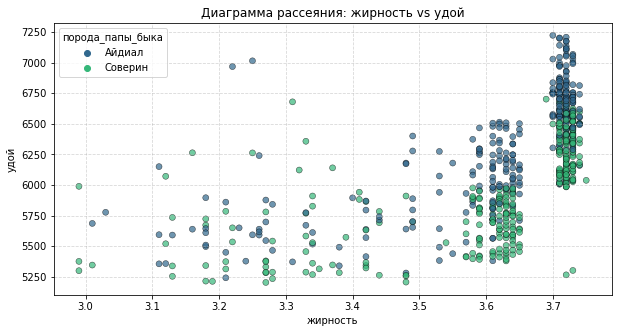

In [96]:
plot_scatter(data_ferma_main, "жирность", "удой", "порода_папы_быка")

Основной вывод заключается в том, что высокая связь жирности молока с количеством удоя заключается в том, что существует маленькая вариативность значений. Огромное количество значений находятся на отметках 3.6 и 3.7. Тем не менее, 3.7 дает результат больше. Между тем на этих пиках опять доминирует Айдиал в качестве породы папы быка.

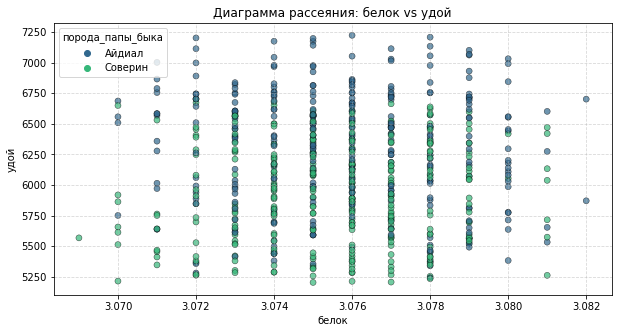

In [97]:
plot_scatter(data_ferma_main, "белок", "удой", "порода_папы_быка")

В случае белка, то действительно линейная связь отсутствует. Примечательной связи с другими категориальными признаками нет.

**Вывод по корреляционному анализу признаков**
* Удой и возраст имеют очень сильную связь - 0.99, следом идут эке и жирность с коэффициентами 0.72 и 0.71 соответсвенно. Если оценивать мультимультиколлинеарность между входящими признаками, то можно заметить сильную связь между эке с возрастом - 0.77, спо с возрастом - 0.75 и эке с жирностью - 0.72. Возможно стоит рассмотреть исключение каких-то из признаков, чтобы не помешать нашей модели линейной регрессии.
* С увеличением эке телята старше 2 лет дают больше удоя, увеличение эке среди группы младше невыразительна. При увеличении эке Айдиал в лице породы папы быка дает больший удой. Но каждое увеличение эке все больше влияет на удой молока. Возможно нелинейная связь
* Высокая связь жирности молока с количеством удоя заключается в том, что существует маленькая вариативность значений. Огромное количество значений находятся на отметках 3.6 и 3.7. Тем не менее, 3.7 дает результат больше. Между тем на этих пиках опять доминирует Айдиал в качестве породы папы быка.
* Порода папы быка влияет на количество удоя, так как у Айдиала больше удоя чем у Соверина.
* На высокий удой влияет именно определенное количество спо, а именно 0.93 и выше. Прямое увеличение спо слабо влияет на количество удоя. Возможно имеет смысл поменять весь столбец данных(сдо) на категориальный признак выше 0.92 или нет
* Высокая связь жирности молока с количеством удоя заключается в том, что существует маленькая вариативность значений. Огромное количество значений находятся на отметках 3.6 и 3.7. Тем не менее, 3.7 дает результат больше. Между тем на этих пиках опять доминирует Айдиал в качестве породы папы быка.
* Вкус молока не влияет на удой коровы. Можно выделить только то, что у данных с самым большим удоем всегда именно вкусное молоко. Можно отнести этот признак к нелинейной связи. Среди высокого эке также много вкусного молока.
* Нелинейная связь также наблюдается у связи породы на количество удоя, так как она неразличима между породами. Тип пастбищ и сырой протеин имеют слабую связь. В случае белка линейная связь отсутствует. Возможно стоит добавить новые признаки.

**Идеальный вариант для высокого удоя: теленок старше 2 лет с отцом породы Айдиал, высоким эке и значением спо выше 0.92.**

## Обучение модели линейной регрессии

**Построим первую модель линейной регрессии:**
* Целевой признак: удой, кг
* Входящие признаки: возраст, порода папы быка, жирность, ЭКЕ, СПО и сырой протеин.

Основная аргументация по выбору именно данных входящих признаков была приведена выше. Остается только объяснить такой выбор с точки зрения причинно-следственной связи. Более взрослая корова очевидно даст больше удоя, чем молодая. Порода папы быка влияет на удой на уровне генов. ЭКE, СПО и сырой протеин непосредственно влияют на корм(питание) кормы, что отражается на удое. Жирность молока можно также включить несмотря на маленькую вариативностость, потому что высокому удою соответствует высокая жирность. Несмотря на очевидную нелинейную связь у некоторых признаков было принято решение оставить их в первой модели, так как в учет берется коэффициент корреляции. В последующих моделях будут проведены изменения.

In [98]:
RANDOM_STATE = 42
X = data_ferma_main.drop(columns={"удой", "id", "порода", "тип_пастбища", "вкус_молока", "белок"})
y = data_ferma_main["удой"]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

In [100]:
cat_col_names = ["возраст", "порода_папы_быка"]
num_col_names = ["жирность", "сырой_протеин", "эке","спо"]

In [101]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

In [102]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

In [103]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [104]:
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

In [105]:
residuals = y_test - predictions

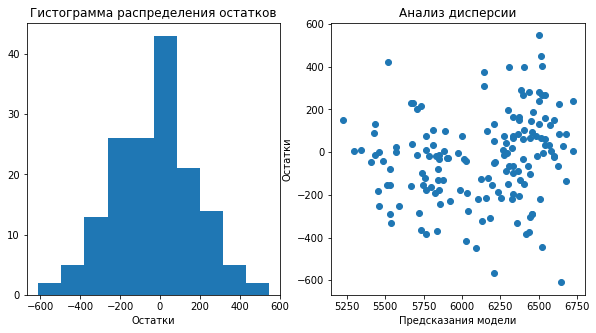

In [106]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Распределение остатков показывает смещённое вправо нормальное распределение. Модель недооценивает реальные значения целевого признака, ее прогнозы меньше фактических. Дисперсия остатков стремится быть постоянной, но мы видим, что постояноство нарушается на второй части и начинает походить на дугу, что говорит нам о неидеальной модели

In [107]:
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)

In [108]:
print(f"R^2 score: {r2:.2f}")
print(f"mse score: {mse:.2f}")
print(f"rmse score: {rmse:.2f}")
print(f"mae score: {mae:.2f}")

R^2 score: 0.80
mse score: 42990.30
rmse score: 207.34
mae score: 160.11


Результаты показывают, что наша модель в 80% случаев предсказывает точнее чем среднее значение целевого признака. Тем не менее, модель в среднем ошибается на 42990.30 кг^2 и 207.34 кг. Если говорить об абсолютной метрике, то модель в среднем ошибается на 160.11 кг.

Нужно провести дополнительные исследования, так как например некоторые признаки можно преобразовать для линейной зависимости. Также нужно уменьшить наши остатки.

**Построим вторую модель линейной регрессии:**
* Целевой признак: удой, кг
* Входящие признаки: возраст, порода папы быка, жирность, ЭКЕ, ЭКЕ в квадрате, СПО и сырой протеин.

Основным отличием будет являться, то что мы преобразуем данные в СПО и ЭКЕ. Как уже описывалось ранее в них наблюдается нелинейная связь. В случае спо мы поменяем ее на категориальную, а эке возведем в квадрат и добавим в таблицу, чтобы также учитывать нелинейную связь.

In [109]:
data_new_ferma = data_ferma_main.copy()

In [110]:
data_new_ferma['спо'] = data_new_ferma['спо'].apply(lambda x: 'больше' if x > 0.92 else 'меньше')

In [111]:
data_new_ferma['эке2'] = data_new_ferma['эке'] ** 2

In [112]:
display(data_new_ferma)

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,эке2
0,1,5863,14.2,1743,меньше,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64
1,2,5529,12.8,2138,меньше,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,163.84
2,3,5810,14.0,1854,меньше,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,196.00
3,4,5895,12.4,2012,меньше,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76
4,5,5302,12.8,1675,меньше,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,163.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,625,6812,15.4,1964,больше,РефлешнСоверинг,равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет,237.16
622,626,5513,12.9,1700,меньше,РефлешнСоверинг,равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,166.41
623,627,5970,14.4,1837,меньше,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,207.36
624,628,5746,13.8,1994,меньше,РефлешнСоверинг,равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,190.44


In [113]:
RANDOM_STATE = 42
X = data_new_ferma.drop(columns={"удой", "id", "порода", "тип_пастбища", "вкус_молока", "белок"})
y = data_new_ferma["удой"]

In [114]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

In [115]:
cat_col_names = ["возраст", "порода_папы_быка", "спо"]
num_col_names = ["жирность", "сырой_протеин","эке2", "эке"]

In [116]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

In [117]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

In [118]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [119]:
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

In [120]:
residuals = y_test - predictions

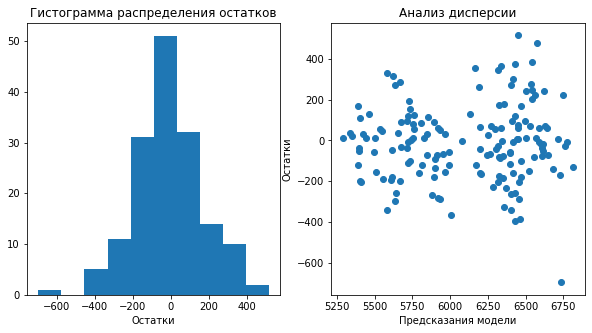

In [121]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Распределение остатков показывает несмещенное нормальное распределение, но присутсвутют некоторые выбросы. Модель верно оценивает фактические результаты, но может ошибиться в определенных случаях. По сравнению с прошлой моделью дисперсия начинается стремиться к постоянному рассеиванию, но присутствуют выбросы.

In [122]:
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)

In [123]:
print(f"R^2 score: {r2:.3f}")
print(f"mse score: {mse:.2f}")
print(f"rmse score: {rmse:.2f}")
print(f"mae score: {mae:.2f}")

R^2 score: 0.836
mse score: 34720.06
rmse score: 186.33
mae score: 142.32


Мы видим большой прогресс по сравнению с прошлой моделью. Все метрики показывают лучший результат. Теперь наша модель в 84% случаев предсказывает точнее чем среднее значение целевого признака. Тем не менее модель есть куда улучшить, нужно добавить новый признак.

**Построим третью модель линейной регрессии:**
* Целевой признак: удой, кг
* Входящие признаки: возраст, имя папы, жирность, ЭКЕ, ЭКЕ в квадрате, СПО и сырой протеин.

Основным отличием будет являться, то что мы добавим имя папы коровы в наш датафрэйм, чтобы учитывать не только породу, но и отдельные особи. Мы также исключим породу папы быка из-за связи.

In [124]:
display(data_ferma_dad)

,id,имя_папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
...,...,...
624,625,Буйный
625,626,Барин
626,627,Барин
627,628,Барин


In [125]:
data_ferma = data_new_ferma.merge(data_ferma_dad, on='id', how='left')

In [126]:
display(data_ferma)

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст,эке2,имя_папы
0,1,5863,14.2,1743,меньше,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,201.64,Буйный
1,2,5529,12.8,2138,меньше,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,163.84,Соловчик
2,3,5810,14.0,1854,меньше,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,196.00,Барин
3,4,5895,12.4,2012,меньше,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,153.76,Буйный
4,5,5302,12.8,1675,меньше,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,163.84,Барин
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,625,6812,15.4,1964,больше,РефлешнСоверинг,равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет,237.16,Буйный
622,626,5513,12.9,1700,меньше,РефлешнСоверинг,равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет,166.41,Барин
623,627,5970,14.4,1837,меньше,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет,207.36,Барин
624,628,5746,13.8,1994,меньше,РефлешнСоверинг,равнинное,Соверин,3.64,3.077,вкусно,более_2_лет,190.44,Барин


In [127]:
RANDOM_STATE = 42
X = data_ferma.drop(columns={"удой", "id", "порода", "тип_пастбища", "вкус_молока", "белок", "порода_папы_быка"})
y = data_ferma["удой"]

In [128]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

In [129]:
cat_col_names = ["возраст", "спо", "имя_папы"]
num_col_names = ["жирность", "сырой_протеин", "эке","эке2"]

In [130]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

In [131]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

In [132]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [133]:
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

In [134]:
residuals = y_test - predictions

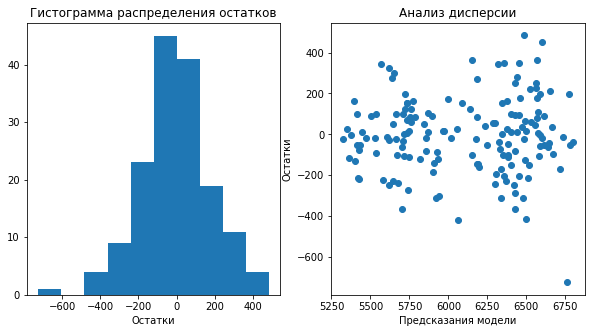

In [135]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Распределение остатков показывает несмещенное нормальное распределение, но присутсвутют некоторые выбросы. Модель верно оценивает фактические результаты, но может ошибиться в определенных случаях. По сравнению со всеми прошлыми дисперсиями эта лучше всех из-за более выразительного постоянного рассеивания.

In [136]:
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)

In [137]:
print(f"R^2 score: {r2:.3f}")
print(f"mse score: {mse:.2f}")
print(f"rmse score: {rmse:.2f}")
print(f"mae score: {mae:.2f}")

R^2 score: 0.841
mse score: 33755.67
rmse score: 183.73
mae score: 139.75


Итоги:
1. Модель 1:
* R^2 score: 0.80%
* MSE score: 42990.30 кг^2
* RMSE score: 207.34 кг
* MAE score: 160.11 кг
2. Модель 2:
* R^2 score: 0.836%
* MSE score: 34720.06 кг^2
* RMSE score: 186.33 кг
* MAE score: 142.32 кг
3. Модель 3:
* R^2 score: 0.841%
* MSE score: 33755.67 кг^2
* RMSE score: 183.73 кг
* MAE score: 139.75 кг

Если судить по метрикам, то 3 модель лучше всех предыдущих абсолютно везде. У нее лучший показатель всех score. Тем не менее, 3 модель не сильно лучше 2 модели. Давайте проанализируем их остатки. Самой лучшей гистограммой распределения обладает 2 модель из-за несмещенного нормального распределения, далее 3 модель, которая также обладает несмещенным нормальным распределением, но хуже из-за выбросов. Модель 1 вовсе всмещенна вправо. Если говорить о дисперсии, то лучшей дисперсией обладает 3 модель, начиная от 1 до 3 с каждой моделью дисперсия стремилась все больше выражать постоянное рассеивание.

**По итогу лучшей моделью является: Модель 3**

In [138]:
train_predictions = model_lr.predict(X_train)
train_residuals = y_train - train_predictions

In [139]:
lower_quantile = np.quantile(train_residuals, 0.025) 
upper_quantile = np.quantile(train_residuals, 0.975)

In [140]:
lower_bound = predictions + lower_quantile
upper_bound = predictions + upper_quantile

In [141]:
results = pd.DataFrame({
    "Настоящий": y_test,
    "Предсказанный": predictions,
    "Нижняя граница": lower_bound,
    "Вверхняя граница": upper_bound
})

In [142]:
display(results)

,Настоящий,Предсказанный,Нижняя граница,Вверхняя граница
448,6574,6637.108323,6316.500637,7034.279047
486,6702,6666.171337,6345.563651,7063.342062
215,6704,6356.257588,6035.649902,6753.428313
212,6081,6053.648938,5733.041251,6450.819662
481,6583,6599.641703,6279.034017,6996.812428
...,...,...,...,...
519,5347,5424.957817,5104.350131,5822.128542
364,5456,5443.562622,5122.954936,5840.733347
79,5640,6059.493775,5738.886089,6456.664500
23,5372,5618.952060,5298.344374,6016.122785


Сверху представлен доверительный интервал лучшей модели для всех значений.

In [143]:
display(data_cow_buy)

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
7,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет
8,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет
9,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет


In [144]:
data_cow = data_cow_buy.copy()

In [145]:
cow_results = data_cow_buy.copy()

In [146]:
data_cow["эке"] = (data_ferma['эке'].mean() * 1.05)

In [147]:
display(data_cow["эке"])

0     15.276997
1     15.276997
2     15.276997
3     15.276997
4     15.276997
5     15.276997
6     15.276997
7     15.276997
8     15.276997
9     15.276997
10    15.276997
11    15.276997
12    15.276997
13    15.276997
14    15.276997
15    15.276997
Name: эке, dtype: float64

In [148]:
check = (data_ferma_main['спо'].mean() * 1.05)

In [149]:
data_cow['спо'] = check

In [150]:
data_cow['спо'] = data_cow['спо'].apply(lambda x: 'больше' if x > 0.92 else 'меньше')

In [151]:
data_cow["сырой_протеин"] = (data_ferma['сырой_протеин'].mean() * 1.05)

In [152]:
data_cow["эке2"] = data_cow["эке"]**2

In [153]:
display(data_cow)

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,эке,спо,сырой_протеин,эке2
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276997,больше,2019.478754,233.386631
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276997,больше,2019.478754,233.386631
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276997,больше,2019.478754,233.386631
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276997,больше,2019.478754,233.386631
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276997,больше,2019.478754,233.386631
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276997,больше,2019.478754,233.386631
6,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276997,больше,2019.478754,233.386631
7,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276997,больше,2019.478754,233.386631
8,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.276997,больше,2019.478754,233.386631
9,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.276997,больше,2019.478754,233.386631


In [154]:
X_new = data_cow.drop(columns={"порода", "тип_пастбища","белок", "порода_папы_быка"})

In [155]:
cat_col_names = ["возраст", "спо", "имя_папы"]
num_col_names = ["жирность", "сырой_протеин", "эке","эке2"]

In [156]:
X_new_ohe = encoder.transform(X_new[cat_col_names])
X_new_ohe = pd.DataFrame(X_new_ohe, columns=encoder_col_names)

In [157]:
X_new_scaled = scaler.transform(X_new[num_col_names])
X_new_scaled = pd.DataFrame(X_new_scaled, columns=num_col_names)

In [158]:
X_new_prepared = pd.concat([X_new_ohe, X_new_scaled], axis=1)

In [159]:
predictions = model_lr.predict(X_new_prepared)

In [160]:
cow_results["предсказанный_удой"] = predictions

**Мы получили наши предсказания**

**Итоги по линейной регрессии:**
Были натренированны 3 разные модели. По результатам метрик и анализу остатков самой лучшей моделью оказалось 3, которая включала в себе новый признак имя отца коровы и были обработанны нелинейные связи. По результатам проверки наша модель в 84% случаев предсказывает точнее чем среднее значение целевого признака. В итоге именно 3 модель была использована для предсказания удоя коров на пастбище «ЭкоФерма».

## Обучение модели логистической регрессии

Мы будем работать с задачей классификации. Для начала надо выявить коэффициенты корреляции.

In [161]:
display(data_ferma_main)

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
621,625,6812,15.4,1964,0.940,РефлешнСоверинг,равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет
622,626,5513,12.9,1700,0.880,РефлешнСоверинг,равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет
623,627,5970,14.4,1837,0.880,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
624,628,5746,13.8,1994,0.890,РефлешнСоверинг,равнинное,Соверин,3.64,3.077,вкусно,более_2_лет


In [162]:
display(data_cow_buy)

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
7,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет
8,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет
9,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет


In [163]:
data_ferma_main.phik_matrix()['вкус_молока'].sort_values(ascending = False)

interval columns not set, guessing: ['id', 'удой', 'эке', 'сырой_протеин', 'спо', 'жирность', 'белок']


вкус_молока         1.000000
спо                 0.575493
эке                 0.276455
тип_пастбища        0.270283
жирность            0.203021
сырой_протеин       0.175284
удой                0.174930
возраст             0.164169
белок               0.131324
id                  0.062096
порода              0.000000
порода_папы_быка    0.000000
Name: вкус_молока, dtype: float64

In [164]:
data_ferma_main['вкус_молока'] = data_ferma_main['вкус_молока'].apply(lambda x: 1 if x == "вкусно" else 0)

In [165]:
RANDOM_STATE = 42

In [166]:
X = data_ferma_main.drop(columns=["вкус_молока", "порода_папы_быка", "id", "удой"])
y = data_ferma_main['вкус_молока']

In [167]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)


In [168]:
cat_col_names = ["возраст", "тип_пастбища"]
num_col_names = ["жирность", "сырой_протеин", "эке", "белок", "спо"]

In [169]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

In [170]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

In [171]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [172]:
clf = LogisticRegression(random_state=RANDOM_STATE)

In [173]:
clf = clf.fit(X_train, y_train)


In [174]:
predictions = clf.predict(X_test)

In [175]:
acc = accuracy_score(y_test, predictions)

In [176]:
recall = recall_score(y_test, predictions)

In [177]:
precision = precision_score(y_test, predictions)

In [178]:
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.57
Precision: 0.60
Recall: 0.80


Мы видим, что наша модель верно классифицирует около 57% наблюдений. Значение точности в свою очередь составляет 60%, что показывает нам количество предсказанных положительных классов(вкусно) верно. Полнота составляет 80%, что показывает сколько модель смогла предсказать истинно положительных классов из всех. 

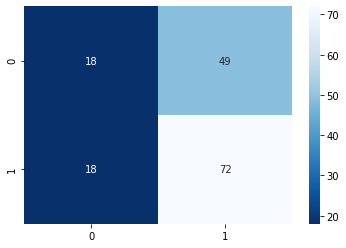

In [179]:
cm = confusion_matrix(y_test, predictions)
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

Если оценивать матрицу ошибок, то мы можем выделить ошибки первого рода и ошибки второго рода
* Ошибки первого рода или False Positive, когда наша модель определила невкусное молоко как вкусное: 49
* Ошибки второго рода или False Negative, когда наша модель определила вкусное молоко как невкусное: 18

В нашем случае ошибки первого рода критичнее, так как нам важно, чтобы наша модель должна избегать выбора невкусного молока. Нам важнее качество. За это отвечает метрика Precision. Нашей задачей является свести ошибки к нулю: для этого мы должны изменить пороги принадлежности к классам. 

In [180]:
y_proba = clf.predict_proba(X_test)[:, 1]

In [181]:
thresholds = [i/100 for i in range(1, 10000)]
best_threshold = 0.5
best_accuracy = 0

In [182]:
for t in thresholds:
    y_pred_new = (y_proba > t).astype(int)
    current_accuracy = accuracy_score(y_test, y_pred_new)
    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_threshold = t

In [183]:
print("Порог:", best_threshold)

Порог: 0.6


**Я нашел новый порог, который равен 0.6**

In [184]:
y_pred_best = (y_proba > best_threshold).astype(int)

In [185]:
acc = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)

In [186]:
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.67
Precision: 0.76
Recall: 0.62


Мы увеличили Precision до максимально возможного значения - 76%. Метрика Accuracy теперь показывает 67%, а recall 62%

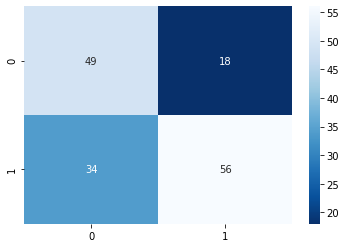

In [187]:
cm = confusion_matrix(y_test, y_pred_best)
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

Мы сократили ошибки первого порядка с 49 до 18, в свою очередь ошибки второго порядка увеличились с 18 до 34

**Результаты неидеальны, в дальнейшем надо будет изучить влияние признаков на таргет более детально. Также надо будет добавить новые значимые признаки.**

In [188]:
data_cow_buy["эке"] = (data_ferma_main['эке'].mean() * 1.05)

In [189]:
data_cow_buy["спо"] = (data_ferma_main['спо'].mean() * 1.05)

In [190]:
data_cow_buy["сырой_протеин"] = (data_ferma_main['сырой_протеин'].mean() * 1.05)

In [191]:
display(data_cow_buy)

,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,эке,спо,сырой_протеин
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276997,0.958905,2019.478754
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276997,0.958905,2019.478754
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276997,0.958905,2019.478754
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276997,0.958905,2019.478754
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276997,0.958905,2019.478754
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276997,0.958905,2019.478754
6,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276997,0.958905,2019.478754
7,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276997,0.958905,2019.478754
8,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.276997,0.958905,2019.478754
9,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.276997,0.958905,2019.478754


In [192]:
display(data_ferma_main)

,id,удой,эке,сырой_протеин,спо,порода,тип_пастбища,порода_папы_быка,жирность,белок,вкус_молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,равнинное,Айдиал,3.58,3.076,1,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,равнинное,Соверин,3.54,3.079,1,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,холмистое,Соверин,3.59,3.074,0,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,холмистое,Айдиал,3.40,3.075,0,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,равнинное,Соверин,3.73,3.073,1,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
621,625,6812,15.4,1964,0.940,РефлешнСоверинг,равнинное,Айдиал,3.74,3.075,0,более_2_лет
622,626,5513,12.9,1700,0.880,РефлешнСоверинг,равнинное,Соверин,3.64,3.073,1,менее_2_лет
623,627,5970,14.4,1837,0.880,РефлешнСоверинг,холмистое,Соверин,3.64,3.075,0,более_2_лет
624,628,5746,13.8,1994,0.890,РефлешнСоверинг,равнинное,Соверин,3.64,3.077,1,более_2_лет


In [193]:
X_new = data_cow_buy.drop(columns=["порода_папы_быка"])

In [194]:
cat_col_names = ["возраст", "тип_паст+бища"]
num_col_names = ["жирность", "сырой_протеин", "эке", "белок", "спо"]

In [195]:
X_new_ohe = encoder.transform(X_new[cat_col_names])
X_new_ohe = pd.DataFrame(X_new_ohe, columns=encoder_col_names)

In [196]:
X_new_scaled = scaler.transform(X_new[num_col_names])
X_new_scaled = pd.DataFrame(X_new_scaled, columns=num_col_names)

In [197]:
X_new_prepared = pd.concat([X_new_ohe, X_new_scaled], axis=1)

In [198]:
y_proba_new = clf.predict_proba(X_new_prepared)[:, 1]
y_pred_new = (y_proba_new > best_threshold).astype(int)

In [199]:
cow_results["предсказанный_вкус"] = y_pred_new

**Вывод по логистической регрессии:**
Для нашей модели намного важнее уменьшить ошибки первого порядка, так как мы должны избегать ситуаций, когда невкусное молоко будет определенно как вкусное. Для этого нам нужно было улучшить показатель метрики Precision. Изначально Precision был равен 60%. После каллибровки, когда был определен новый порог, значение Precision увеличилось до 76%. Далее с новой моделью мы предсказали вкус молока на пастбище «ЭкоФерма».

## Итоговые выводы

**Итоги по обзору данных:**
* По первичном осмотре пропуски не обнаруженны и все типы данных соотвествуют описанию
* Анональных значений на первый взгляд нет
* Есть проблемы с названиями столбцов, нужно привести в змеиный регистр и удалить лишнюю информацию 
* Названия столбцов жирности и белка отличаются в 2 датафреймах, нужно привести их в единный формат

**Итоги предобработки данных:**

* Названия столбцов приведены к корректному формату (змеиный регистр).
* Названия столбцов изменены для удобства анализа данных.
* Пропусков в данных нет.
* Явные и неявные дубликаты устранены.
* Формат и тип данных соответствуют требованиям и не имеют проблем.

**Итоги по исследовательскому анализу данных:**
* Были замечены аномальные значения среди удоя, где максмальный показатель был равен 45616 килограммам. Медианное значение равно 6133 кг, когда максимальное и минимальное равны 7222 и 5204 соотвественно. Доля выбросов меньше 0.5%, поэтому можно безопасно удалить эти данные. Сам график был похож на нормальное распределение.
* График ЭКЕ был скошен направо. Медианное значение равно 14.7, когда максимальное и минимальное равны 16.8 и 10.9 соотвественно.
* На графике сырого протеина мы можем наблюдать большое количество значений в начале и постепенное уменьшение со встречающимися пиками. Медианное значение равно 1888, когда максимальное и минимальное равны 2349 и 1660 соотвественно.
* График СПО нерегулярен. Медианное значение равно 0.93, когда максимальное и минимальное равны 0.96 и 0.84 соотвественно.
* На графике жирности видно, что значения до 3.6 имеют одинаковую низкую частотность. Наблюдаются 2 пика на отметках 3.6 и 3.7. Медианное значение равно 3.65, когда максимальное и минимальное равны 3.75 и 2.99 соотвественно.
* Медианное значение белка равно 3.076, когда максимальное и минимальное равны 3.082 и 3.069 соотвественно. Выбросы были удалены только после отметки 3.084, так как остальные расположенны в относительной близости. Их доля составляет почти 3% от всех данных. Удаление такого большого количества данных недопустимо. Нынешнаяя доля выбросов составила только 0.32%
* Коров породы Вис Бик Айдиал больше в 1.44 раз чем Рефлешн Соверинг.
* Холмистых пастбищ в 1.26 раз больше чем равнинных.
* Пород папы быка практически одинаковы.
* Вкусного молока в 1.43 раза больше чем невкусного.
* Коров старше 2 лет в 4.68 раз больше чем младше.

**Вывод по корреляционному анализу признаков**
* Удой и возраст имеют очень сильную связь - 0.99, следом идут эке и жирность с коэффициентами 0.72 и 0.71 соответсвенно. Если оценивать мультимультиколлинеарность между входящими признаками, то можно заметить сильную связь между эке с возрастом - 0.77, спо с возрастом - 0.75 и эке с жирностью - 0.72. Возможно стоит рассмотреть исключение каких-то из признаков, чтобы не помешать нашей модели линейной регрессии.
* С увеличением эке телята старше 2 лет дают больше удоя, увеличение эке среди группы младше невыразительна. При увеличении эке Айдиал в лице породы папы быка дает больший удой. Но каждое увеличение эке все больше влияет на удой молока. Возможно нелинейная связь
* Высокая связь жирности молока с количеством удоя заключается в том, что существует маленькая вариативность значений. Огромное количество значений находятся на отметках 3.6 и 3.7. Тем не менее, 3.7 дает результат больше. Между тем на этих пиках опять доминирует Айдиал в качестве породы папы быка.
* Порода папы быка влияет на количество удоя, так как у Айдиала больше удоя чем у Соверина.
* На высокий удой влияет именно определенное количество спо, а именно 0.93 и выше. Прямое увеличение спо слабо влияет на количество удоя. Возможно имеет смысл поменять весь столбец данных(сдо) на категориальный признак выше 0.92 или нет
* Высокая связь жирности молока с количеством удоя заключается в том, что существует маленькая вариативность значений. Огромное количество значений находятся на отметках 3.6 и 3.7. Тем не менее, 3.7 дает результат больше. Между тем на этих пиках опять доминирует Айдиал в качестве породы папы быка.
* Вкус молока не влияет на удой коровы. Можно выделить только то, что у данных с самым большим удоем всегда именно вкусное молоко. Можно отнести этот признак к нелинейной связи. Среди высокого эке также много вкусного молока.
* Нелинейная связь также наблюдается у связи породы на количество удоя, так как она неразличима между породами. Тип пастбищ и сырой протеин имеют слабую связь. В случае белка линейная связь отсутствует. Возможно стоит добавить новые признаки.

In [200]:
display(cow_results.query("предсказанный_вкус == 1 and предсказанный_удой > 6000"))


,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность,белок,возраст,предсказанный_удой,предсказанный_вкус
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,6534.976168,1
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,6303.807570,1
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,6263.678675,1
6,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,6521.295808,1
7,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,6276.774367,1
11,Вис Бик Айдиал,холмистое,Соверин,Барин,3.42,3.075,менее_2_лет,6019.157234,1
12,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.065,более_2_лет,6488.469776,1
13,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,6303.195844,1


Мы получили коров, которые удовлетворяют нашим условиям. Именно этих коров можно купить из стада с минимальным риском, так как были использованны лучшие модели. В итоге заказчик может купить 8 коров из 16 предложенных. Ровно половина коров удовлетворяет всем условиям.

При рассмотре потенциальной коровы был выявлен следующий портрет **идеальной коровы**: теленок старше 2 лет с отцом породы Айдиал, высоким эке и значением спо выше 0.92. Советуем обращать внимание именно на данные характеристики при подборе коровы для стада.

Для улучшения модели линейной регрессии мы проходили через ряд изменений. Сначала мы выявили главные входные признаки с наибольшим коэффициентом корреляции и устранили нелинейные связи, преобразовав столбцы данных. Далее для улучшения показателей мы добавили новый описательный признак, который улучшил показатели наших метрик. Улучшить регрессионную модель можно дальше, но для этого нужны инструменты посложнее. Например: использовать модели с регуляризацией, контролировать переобучение или увеличить набор данных. В случае линейной регрессии самыми важными метриками являлись R^2 и MAE, так как они являются наиболее показательными для клиента. В случае логистической регрессии было важно использовать именно метрику Precision, так как она соответствовала нашей бизнес задаче, нам надо было уменьшить количество ошибок первого порядка, чтобы невкусное мололока не показалось вкусным. Другими словами нужно было уменьшить количество ложных положительных результатов. В случае Recall анализируется ошибки второго порядка. То есть сколько раз вкусное молоко определялось невкусным. С точки зрения рисков и экономических расчетов нам важнее именно первые ошибки, так как лучше ошибиться и вкусное молоко назвать невкусным чем наоборот, потому что мы потеряем своих клиентов и понесем большие убытки. 